In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
from time import time
from matplotlib import pyplot as plt

import LimitedCommitmentModel as lcm

path = 'output/'

# c++ settings
do_compile = True
threads = 20

# from EconModel import cpptools
# cpptools.setup_nlopt(folder='cppfuncs/', do_print=True)

# Solve and simulate model

Benchmark model settings

In [2]:
settings = { 
       'T':20,
       'p_meet': 0.1, 
       'div_A_share': 0.5, 
       'sigma_love':0.1, 
       
       'inc_w' : 1.0,
       'inc_m' : 1.5,

       'num_love': 21, 
       'num_A': 50, 
       'num_A_pd':50,

       'simT':20,
       'simN': 10000,

       'do_egm': True,
       'interp_method' : "linear",
       'precompute_intratemporal' : True,
       'interp_inverse': True,
       'num_marg_u': 100,
       'threads':threads,
       }


Setup model

In [3]:
# setup alternative model solution
model = lcm.HouseholdModelClass(par=settings)
model.link_to_cpp(force_compile=False)

In [4]:
def plot_power(par_names,par_values,model):

    # update parameters
    for n,name in enumerate(par_names):
        setattr(model.par,name,par_values[n])
    
    # solve and simulate
    model.solve()
    model.simulate()
    
    # plot
    sim = model.sim
    
    I = sim.power>0
    cons_share  = (sim.Cw_priv/sim.Cm_priv)[I]
    cons_share  = (sim.Cw_priv/sim.C_tot)[I]
    power = sim.power[I]

    fig, ax = plt.subplots()
    ax.scatter(cons_share,power,label=par_values[0],alpha=0.2);
    ax.set(ylim=[0.0,1.0])
    ax.legend();
    

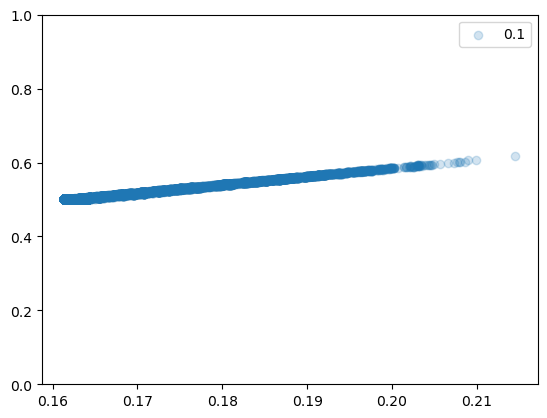

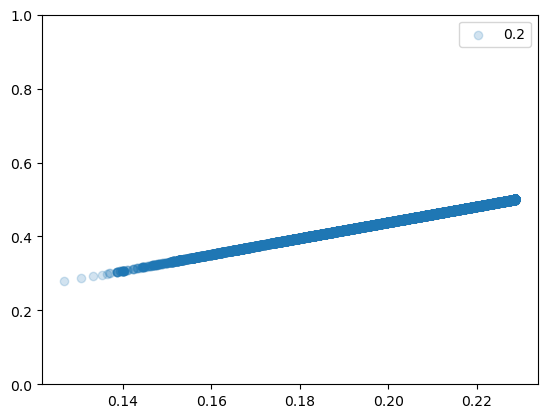

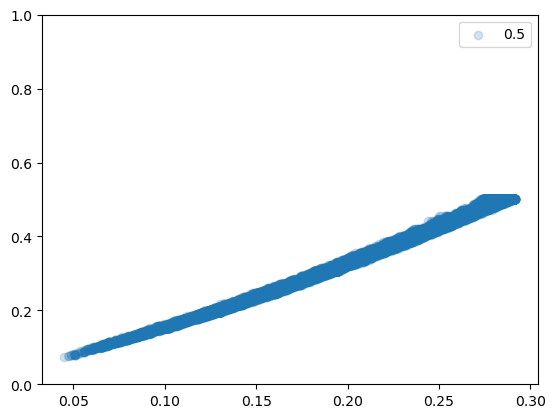

In [5]:
for phi_w in (0.1,0.2,0.5):
    plot_power(('phi_w',),(phi_w,),model)